# Análisis Exploratorio de los Datos


TO DO
* ANALISIS DE CABINA LLENAR ESPACIOS VACIOS CON OTRA LETRA QUE SIGNIFIUQE "OTRO"
* IMPLEMENTAR MODELOS DE CLASIFICACIÓN
* PROBAR DISTINTAS COMBINACIONES DE PARA EL ENTRENAMIENTO

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Carga de la base de datos
titanic = pd.read_csv("train.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Información de la base de datos
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
# Estadística descriptiva de las variables numéricas
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Graficas básicas

In [5]:
titanic.groupby(by='Survived').mean()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,,
0,447.016393,2.531876,30.626179,0.553734,0.329690,22.117887
1,444.368421,1.950292,28.343690,0.473684,0.464912,48.395408


In [6]:
titanic.groupby(by='Survived').count()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Survived,,,,,,,,,,,
0,549,549,549,549,424,549,549,549,549,68,549
1,342,342,342,342,290,342,342,342,342,136,340


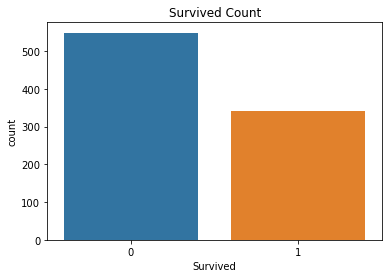

In [7]:
sns.countplot(data=titanic, x='Survived')
sns.set_palette('Set1')

plt.title('Survived Count')
plt.xlabel('Survived')

plt.show()

Text(0.5, 1.0, 'Passengers status vs gender')

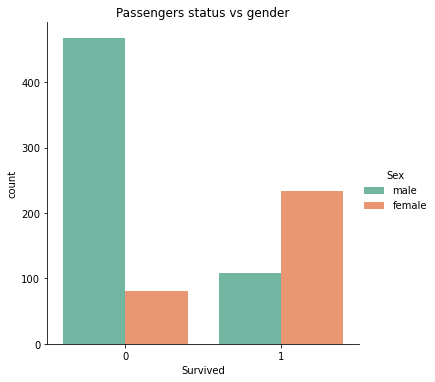

In [8]:
sns.set_palette('Set2')
sns.catplot(x = "Survived", data = titanic, kind = "count", hue = "Sex");
plt.title('Passengers status vs gender')

Text(0.5, 1.0, 'Passengers status vs Passenger class')

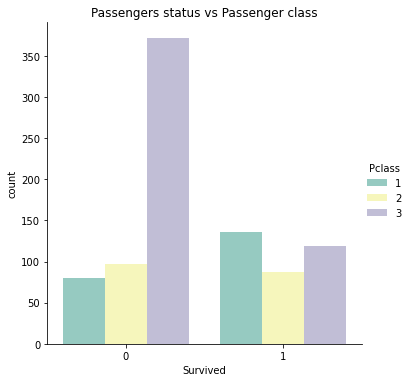

In [9]:
sns.set_palette('Set3')
sns.catplot(x = "Survived", data = titanic, kind = "count", hue = "Pclass");
plt.title('Passengers status vs Passenger class')

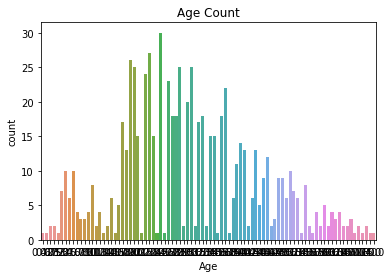

In [10]:
sns.countplot(data=titanic, x='Age')
sns.set_palette('Set1')
plt.title('Age Count')
plt.xlabel('Age')
plt.show()

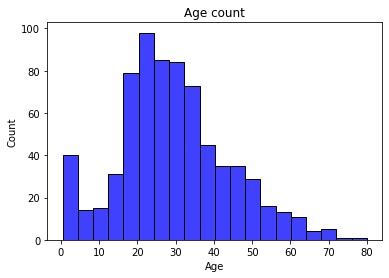

In [11]:
sns.histplot(data = titanic, x = 'Age', color = 'blue')
plt.title('Age count')
plt.xlabel('Age')
plt.show()

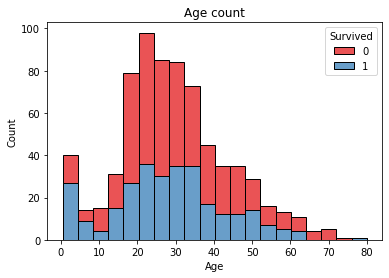

In [12]:
sns.histplot(data = titanic, x = 'Age', color = 'blue', hue = 'Survived', multiple="stack")
plt.title('Age count')
plt.xlabel('Age')
plt.show()

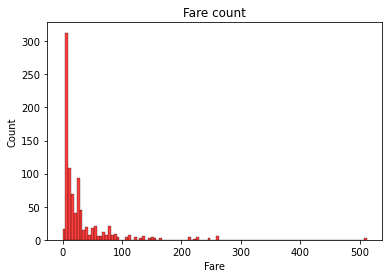

In [13]:
sns.histplot(data = titanic, x = 'Fare', color = 'red')
plt.title('Fare count')
plt.xlabel('Fare')
plt.show()

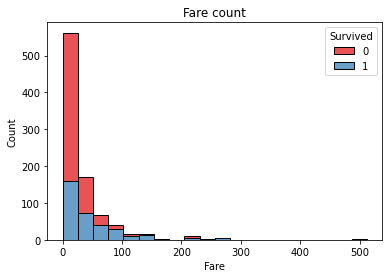

In [14]:
sns.histplot(data = titanic, x = 'Fare', color = 'red', hue = 'Survived', multiple="stack", bins = 20)
plt.title('Fare count')
plt.xlabel('Fare')
plt.show()

## Valores nulos

In [15]:
# Número de datos nulos por feature
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Se observa que el número de cabina (`Cabin`) de los pasajeros cuenta con muy pocos registros, pues la mayoría son nulos. Por lo tanto, se decide eliminar dicha variable, ya que además no es una variable relevante para construir el modelo. De igual forma se eliminan las variables `PassengerId` y `Ticket` ya que es una variable que únicamente sirve para llevar un orden 

### Registros duplicados

In [16]:
# No hay valores duplicados en la base de datos.
titanic.duplicated().sum()

0

In [17]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### Tratamiento de la variable `Passenger Id` y `Ticket`

In [18]:
## Se van a eliminar las variables, ya que únicamente funciona como un dentificador únicos de los registros,
## por lo que no brinda ninguna información relevante de predicción
titanic.drop(['Ticket','PassengerId'], axis=1, inplace=True)
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S


### Tratamiento de la variable `Pclass`

In [19]:
titanic['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [20]:
titanic = titanic.join(pd.get_dummies(titanic.Pclass, prefix = 'Class'), how = 'inner')
titanic.drop('Pclass', axis=1, inplace=True)
titanic.head()

,Survived,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Class_1,Class_2,Class_3
0,0,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S,0,0,1
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C,1,0,0
2,1,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S,0,0,1
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S,1,0,0
4,0,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S,0,0,1


### Tratamiento de la variable `Sex`

In [21]:
## Se aplica un label encoder para pasar los datos cualitativos a variables categóricas numéricas
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()

# 0: female
# 1: male

titanic['Sex'] = encoder.fit_transform(titanic['Sex'])
titanic.head()

,Survived,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Class_1,Class_2,Class_3
0,0,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,NaN,S,0,0,1
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,C85,C,1,0,0
2,1,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,NaN,S,0,0,1
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,C123,S,1,0,0
4,0,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,NaN,S,0,0,1


### Tratamiento de la variable `Embarked`

In [22]:
titanic = titanic.join(pd.get_dummies(titanic.Embarked, prefix = 'Embarked'), how = 'inner')
titanic.drop('Embarked', axis=1, inplace=True)
titanic.head()

,Survived,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Class_1,Class_2,Class_3,Embarked_C,Embarked_Q,Embarked_S
0,0,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,NaN,0,0,1,0,0,1
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,C85,1,0,0,1,0,0
2,1,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,NaN,0,0,1,0,0,1
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,C123,1,0,0,0,0,1
4,0,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,NaN,0,0,1,0,0,1


### Tratamiento de la variable `Cabin`

In [23]:
titanic['Cabin'] = titanic['Cabin'].fillna('Z')

In [24]:
sections = []
for i in titanic['Cabin']:
    sections.append(i[0])

In [25]:
titanic['Cabin'] = sections
titanic.head()

,Survived,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Class_1,Class_2,Class_3,Embarked_C,Embarked_Q,Embarked_S
0,0,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,Z,0,0,1,0,0,1
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,C,1,0,0,1,0,0
2,1,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,Z,0,0,1,0,0,1
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,C,1,0,0,0,0,1
4,0,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,Z,0,0,1,0,0,1


In [26]:
titanic['Cabin'].value_counts()

Z    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

In [27]:
titanic['Cabin'] = encoder.fit_transform(titanic['Cabin'])
titanic.head()

,Survived,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Class_1,Class_2,Class_3,Embarked_C,Embarked_Q,Embarked_S
0,0,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,8,0,0,1,0,0,1
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,2,1,0,0,1,0,0
2,1,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,8,0,0,1,0,0,1
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,2,1,0,0,0,0,1
4,0,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,8,0,0,1,0,0,1


### Tratamiento de la variable `Age`

* **Opción 1:** eliminar registros con edad faltante
* **Opción 2:** rellenar con datos con algún método (regresión, viendo nombres, etc)
* **Opción 3:** cambiar a variables categóricas (niño, adulto, anciano)

In [28]:
titanic[titanic['Age'] == 0.92]

,Survived,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Class_1,Class_2,Class_3,Embarked_C,Embarked_Q,Embarked_S
305,1,"Allison, Master. Hudson Trevor",1,0.92,1,2,151.55,2,1,0,0,0,0,1


In [29]:
## Se truncan las edades al entero más bajo
titanic['Age'] = titanic['Age'].apply(np.floor)

In [30]:
titanic[titanic['Age'] == 0.92] 

,Survived,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Class_1,Class_2,Class_3,Embarked_C,Embarked_Q,Embarked_S


In [31]:
## Pasajeros sin edad
sin_edad = titanic.loc[titanic['Age'].isnull()]
sin_edad

,Survived,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Class_1,Class_2,Class_3,Embarked_C,Embarked_Q,Embarked_S
5,0,"Moran, Mr. James",1,NaN,0,0,8.4583,8,0,0,1,0,1,0
17,1,"Williams, Mr. Charles Eugene",1,NaN,0,0,13.0000,8,0,1,0,0,0,1
19,1,"Masselmani, Mrs. Fatima",0,NaN,0,0,7.2250,8,0,0,1,1,0,0
26,0,"Emir, Mr. Farred Chehab",1,NaN,0,0,7.2250,8,0,0,1,1,0,0
28,1,"O'Dwyer, Miss. Ellen ""Nellie""",0,NaN,0,0,7.8792,8,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,0,"Razi, Mr. Raihed",1,NaN,0,0,7.2292,8,0,0,1,1,0,0
863,0,"Sage, Miss. Dorothy Edith ""Dolly""",0,NaN,8,2,69.5500,8,0,0,1,0,0,1
868,0,"van Melkebeke, Mr. Philemon",1,NaN,0,0,9.5000,8,0,0,1,0,0,1
878,0,"Laleff, Mr. Kristo",1,NaN,0,0,7.8958,8,0,0,1,0,0,1


In [32]:
titanic[titanic['Name'] == 'Moran, Mr. James']

,Survived,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Class_1,Class_2,Class_3,Embarked_C,Embarked_Q,Embarked_S
5,0,"Moran, Mr. James",1,NaN,0,0,8.4583,8,0,0,1,0,1,0


In [33]:
## Remplazar los valores nulos de edad por la media de dicha variable
media_age = np.floor(titanic['Age'].mean())
media_age

29.0

# De momento eliminaremos los valores nulos de la edad TO DO:

In [34]:
#titanic['Age'] = titanic['Age'].fillna(media_age)

In [35]:
#titanic.isnull().sum()

In [36]:
#titanic.shape

### Tratamiento de la variable `Fare`

In [37]:
## En el análisis descriptivo de los datos se muestra que el valor mínimo de la variable es 0, por lo que se analizarán
## dichos registros
titanic.loc[titanic['Fare'] == 0]

,Survived,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Class_1,Class_2,Class_3,Embarked_C,Embarked_Q,Embarked_S
179,0,"Leonard, Mr. Lionel",1,36.0,0,0,0.0,8,0,0,1,0,0,1
263,0,"Harrison, Mr. William",1,40.0,0,0,0.0,1,1,0,0,0,0,1
271,1,"Tornquist, Mr. William Henry",1,25.0,0,0,0.0,8,0,0,1,0,0,1
277,0,"Parkes, Mr. Francis ""Frank""",1,NaN,0,0,0.0,8,0,1,0,0,0,1
302,0,"Johnson, Mr. William Cahoone Jr",1,19.0,0,0,0.0,8,0,0,1,0,0,1
413,0,"Cunningham, Mr. Alfred Fleming",1,NaN,0,0,0.0,8,0,1,0,0,0,1
466,0,"Campbell, Mr. William",1,NaN,0,0,0.0,8,0,1,0,0,0,1
481,0,"Frost, Mr. Anthony Wood ""Archie""",1,NaN,0,0,0.0,8,0,1,0,0,0,1
597,0,"Johnson, Mr. Alfred",1,49.0,0,0,0.0,8,0,0,1,0,0,1
633,0,"Parr, Mr. William Henry Marsh",1,NaN,0,0,0.0,8,1,0,0,0,0,1


### Eliminación de registros con valores nulos
Finalmente eliminamos aquellos registros con valores nulos en la variable `Embarked`

In [38]:
titanic.shape

(891, 14)

In [39]:
titanic = titanic.dropna()
titanic.shape

(714, 14)

## Valores Atípicos

In [40]:
def detectorAtipicos(variable):
    q1 = np.percentile(titanic[variable], 25)
    q3 = np.percentile(titanic[variable], 75)
    mu = titanic[variable].mean()
    sigma = titanic[variable].std()
    
    return titanic.loc[(titanic[variable] > q3 + 1.5*sigma) | (titanic[variable] < q1 - 1.5*sigma)]

In [41]:
detectorAtipicos('Age').shape

(26, 14)

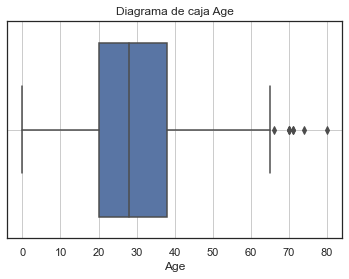

In [42]:
sns.set_theme(style='white')
ax = sns.boxplot(x=titanic['Age'])
plt.title('Diagrama de caja Age')
plt.grid()

In [43]:
detectorAtipicos('Fare').shape

(41, 14)

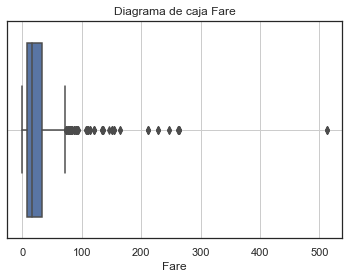

In [44]:
ax = sns.boxplot(x=titanic['Fare'])
plt.title('Diagrama de caja Fare')
plt.grid()

In [45]:
detectorAtipicos('SibSp').shape

(35, 14)

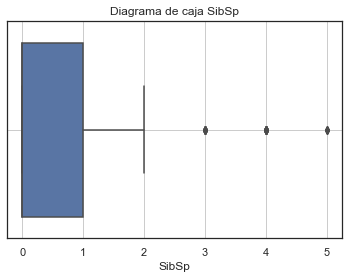

In [46]:
ax = sns.boxplot(x=titanic['SibSp'])
plt.title('Diagrama de caja SibSp')
plt.grid()

In [47]:
detectorAtipicos('Parch').shape

(15, 14)

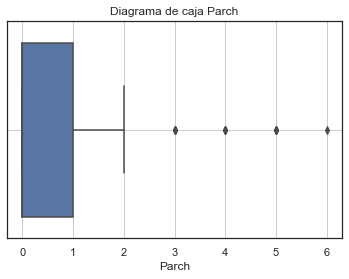

In [48]:
ax = sns.boxplot(x=titanic['Parch'])
plt.title('Diagrama de caja Parch')
plt.grid()

## Correlación

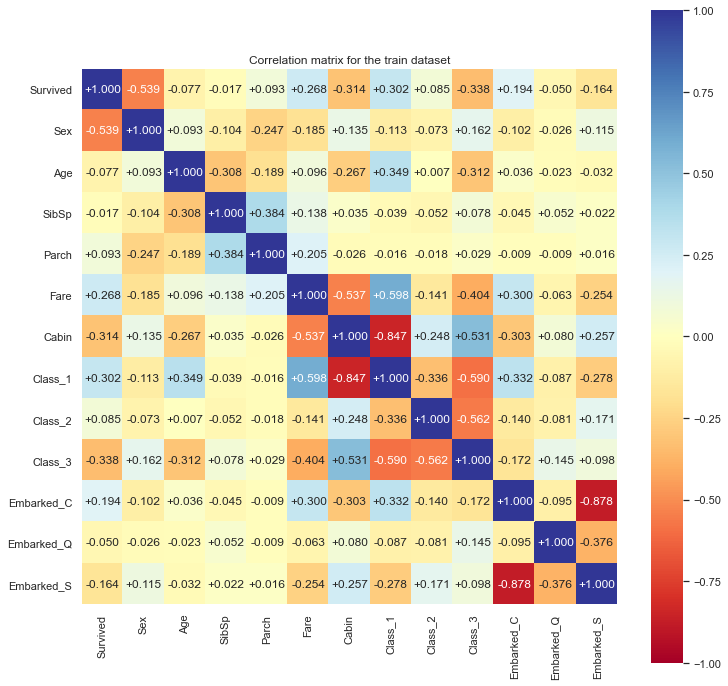

In [49]:
plt.figure(figsize=(12,12))
sns.heatmap(titanic.corr(), cmap="RdYlBu", 
    annot=True, square=True,
    vmin=-1, vmax=1, fmt="+.3f")
plt.title("Correlation matrix for the train dataset")
plt.show()

## Creación de set de validación para los modelos

In [50]:
from sklearn.model_selection import train_test_split
X = titanic[['Sex','Class_1', 'Class_2', 'Class_3']]
Y = titanic['Survived']

In [51]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_t = scaler.fit_transform(X)

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25)
## Visualización de los tamaños de los conjuntos de datos
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((535, 4), (179, 4), (535,), (179,))

# Implementación de Modelos de Machine Learning

### XGB Classifier

In [53]:
# Librerías a utilizar
from sklearn.metrics import confusion_matrix, accuracy_score # Medidas de evaluación

from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV # Algoritmo de búsqueda de los mejores hiperparámetros del modelo

In [54]:
#Defining the parameters to search within
param_grid = {
'n_estimators': range(0, 10),
'max_depth': range(3, 10),
'learning_rate': [.2, .3, .4],
'colsample_bytree': [.7, .8, .9, 1], 'eta': [0.2, 0.3, 0.4]   
}

param = {'max_depth': 3, 'eta': 0.3, 'objective': 'multi:softprob','num_class': 9}

#Specifying our classifier
xgb = XGBClassifier()

#Searching for the best parameters
g_search = GridSearchCV(estimator = xgb, param_grid = param_grid,
cv = 3, n_jobs = 1, verbose = 0, return_train_score=True)

#Fitting the model using best parameters found
g_search.fit(X_train, y_train)

#Printing the best parameters found
print(g_search.best_params_)

{'colsample_bytree': 0.7, 'eta': 0.2, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 5}


In [55]:
#Calculating the model's score
g_search.score(X_test,y_test)

0.8100558659217877

In [56]:
#Predicting the actual test data
y_pred = g_search.predict(X_test)

In [57]:
accuracy_score(y_test, y_pred)

0.8100558659217877

### Decision Tree Classifier

In [58]:
## Librerías a utilizar
from sklearn.tree import DecisionTreeClassifier 

In [59]:
## Se guarda el modelo en una variable
dtc = DecisionTreeClassifier()

## Se entrena el modelo de árbol de decisión
dtc = dtc.fit(X_train,y_train)

In [60]:
## Se realizan las predicciones
y_pred = dtc.predict(X_test)

In [61]:
# Se calcula la precisión de este nuevo modelo 
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8100558659217877


### Random Forest Classifier

In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [63]:
RandomForestClassifier?

In [64]:
## Se guarda el modelo en una variable
rfc = RandomForestClassifier()

rf_parameters = {'n_estimators': [500,1000,1500,2000],
                 'criterion': ['gini', 'entropy'],
                 'max_depth': [4,5,6]}

grid_rfc = GridSearchCV(rfc, rf_parameters)

grid_rfc.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6],
                         'n_estimators': [500, 1000, 1500, 2000]})

In [65]:
y_pred = grid_rfc.predict(X_test)

In [66]:
# Se calcula la precisión de este nuevo modelo 
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8100558659217877


In [67]:
## Se entrena el modelo de random forest
rfc = rfc.fit(X_train, y_train)

In [68]:
## Se realizan las predicciones
y_pred = rfc.predict(X_test)

In [69]:
## Se calcula la precisión de este nuevo modelo 
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8100558659217877


### Regresión Logística

In [70]:
from sklearn import linear_model
from sklearn import model_selection

In [71]:
lg = linear_model.LogisticRegression()
lg.fit(X,Y)

LogisticRegression()

In [72]:
predictions = lg.predict(X_test)
print(accuracy_score(y_test, predictions))

0.7821229050279329


In [73]:
lg.score(X,Y)

0.7801120448179272

In [74]:
print(confusion_matrix(y_test, predictions))

[[90 17]
 [22 50]]


### Red neuronal (MLP)

## Selección del mejor modelo

### Entrenamiento con todos los datos

In [75]:
X = titanic[['Sex','Class_1', 'Class_2', 'Class_3']]
Y = titanic['Survived']

In [76]:
#Defining the parameters to search within
param_grid = {
'n_estimators': range(0, 10),
'max_depth': range(3, 10),
'learning_rate': [.2, .3, .4],
'colsample_bytree': [.7, .8, .9, 1], 'eta': [0.2, 0.3, 0.4]   
}

param = {'max_depth': 3, 'eta': 0.3, 'objective': 'multi:softprob','num_class': 9}

#Specifying our classifier
xgb = XGBClassifier()

#Searching for the best parameters
g_search = GridSearchCV(estimator = xgb, param_grid = param_grid,
cv = 3, n_jobs = 1, verbose = 0, return_train_score=True)

#Fitting the model using best parameters found
g_search.fit(X, Y)

#Printing the best parameters found
print(g_search.best_params_)

{'colsample_bytree': 0.7, 'eta': 0.2, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 8}


## Conjunto de evaluación


In [77]:
## Se carga el set de prueba con el que se realizaran las predicciones
test = pd.read_csv('test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Se realiza todo el tramiento de los datos de prueba para poder aplicar los modelos anteriormente generados. 

In [78]:
test = test.join(pd.get_dummies(test.Pclass, prefix = 'Class'), how = 'inner')
test.drop('Pclass', axis=1, inplace=True)
test.head()

,PassengerId,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Class_1,Class_2,Class_3
0,892,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,0,1
1,893,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,0,1
2,894,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,1,0
3,895,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,0,1
4,896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,0,1


In [79]:
# 0: female
# 1: male

test['Sex'] = encoder.fit_transform(test['Sex'])
test.head()

,PassengerId,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Class_1,Class_2,Class_3
0,892,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,Q,0,0,1
1,893,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,S,0,0,1
2,894,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,Q,0,1,0
3,895,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,S,0,0,1
4,896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,S,0,0,1


In [80]:
x_test = test[['Sex','Class_1', 'Class_2', 'Class_3']]

In [81]:
x_test.shape

(418, 4)

In [82]:
#Predicting the actual test data
y_pred = g_search.predict(x_test)

In [83]:
archivo_resultados(y_pred)

NameError: name 'archivo_resultados' is not defined

In [ ]:
test['Sex'] = encoder.fit_transform(test['Sex'])
test['Embarked'] = encoder.fit_transform(test['Embarked'])
test.head()

In [ ]:
test2 = pd.get_dummies(test, columns = ['Pclass'])
test2

In [ ]:
media_age = np.floor(test['Age'].mean())
test['Age'] = test['Age'].fillna(media_age)

media_fare = np.floor(test['Fare'].mean())
test['Fare'] = test['Fare'].fillna(media_fare)

In [ ]:
x_test_prueba = test[['Sex','Pclass']]

In [ ]:
x_test_prueba = test2[['Sex','Pclass_1','Pclass_2','Pclass_3']]

In [ ]:
x_test_prueba.isnull().shape

In [ ]:
# Se realizan predicciones con el set de prueba
y_pred = rfc.predict(x_test_prueba)

### Predicciones y generación de archivos csv

In [ ]:
## Creación del archivo csv con las predicciones
def archivo_resultados(predicciones):
    ids = np.arange(892, 1310)
    resultados = pd.DataFrame(test['PassengerId'])
    resultados['Survived'] = predicciones
    resultados = resultados.set_index('PassengerId')
    resultados.to_csv('Resultados7.csv')
    print('Archivo \'csv\' generado')
    return resultados.value_counts()